<a href="https://colab.research.google.com/github/sukritganesh/JupyterDive/blob/master/TaxationCurve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy

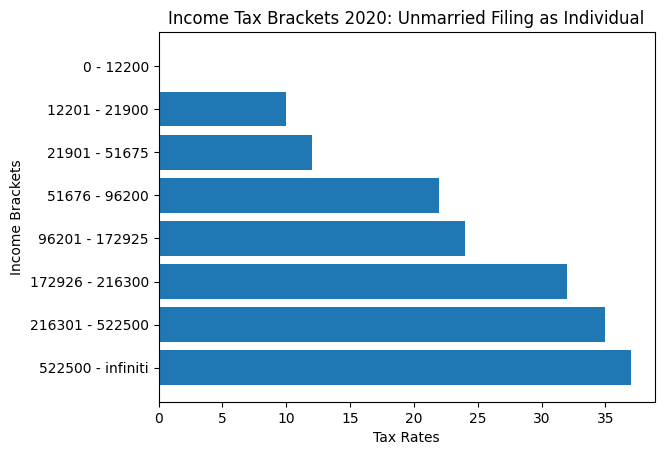

In [ ]:
# We will plot the current tax brackets for unmarried individuals (2019 fiscal year)
# The income includes standard deduction, meaning that individuals earning less than $12200 annualy pay no taxes
# X-Axis: income brackets, Y-Axis: tax rates (in percent)

taxBrackets = {'0 - 12200': 0, '12201 - 21900': 10, '21901 - 51675': 12, '51676 - 96200': 22, '96201 - 172925': 24, '172926 - 216300': 32, '216301 - 522500': 35, '522500 - infiniti': 37}
incomeBrackets = list(taxBrackets.keys())
taxRates = list(taxBrackets.values())

# plt.bar(range(len(taxRates)), taxRates, align='center')
# plt.xticks(range(len(incomeBrackets)), incomeBrackets)

plt.rcdefaults()
fig, ax = plt.subplots()

y_pos = np.arange(len(incomeBrackets))

ax.barh(y_pos, taxRates, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(incomeBrackets)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Tax Rates')
ax.set_ylabel('Income Brackets')
ax.set_title('Income Tax Brackets 2020: Unmarried Filing as Individual')

plt.show()

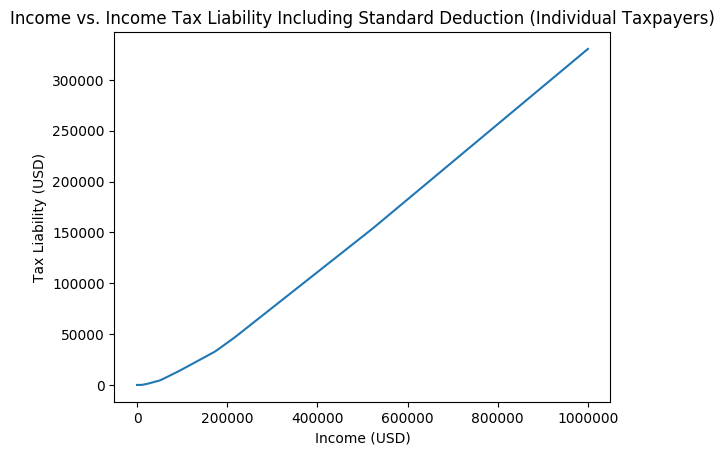

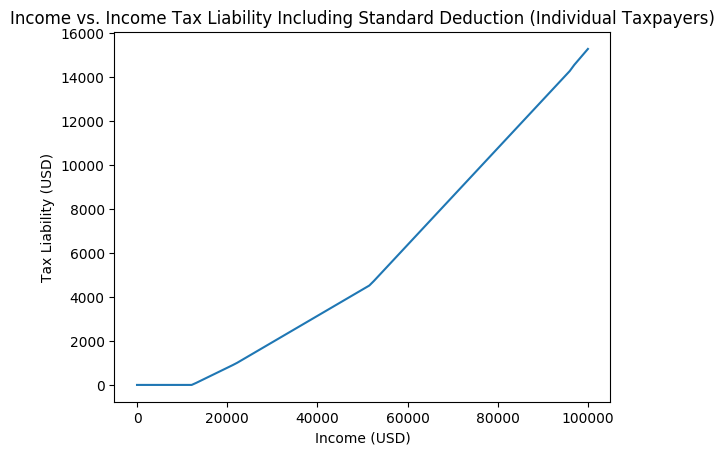

In [ ]:
# We can plot income tax as a function of income
# It is a piecewise function

plt.rcdefaults()
def taxLiabilityFunction(x):
  conds = [(x > 0) & (x < 12200), (x > 12200) & (x < 21900), (x > 21900) & (x < 51675), (x > 51675) & (x < 96200), (x > 96200) & (x < 172925), (x > 172925) & (x < 216300), (x > 216300) & (x < 522500), x > 522500]
  funcs = [lambda x: 0, lambda x: 0.1*(x - 12200), lambda x: 970 + 0.12*(x - 21900), 
           lambda x: 4543 + 0.22*(x - 51675), lambda x: 14382 + 0.24*(x - 96200), lambda x: 32748 + 0.32*(x - 172925), 
           lambda x: 46628 + 0.35*(x - 216300), lambda x: 153798 + 0.37*(x - 522500)]
  return np.piecewise(x, conds, funcs)

xx = np.linspace(0, 1000000, 100)
plt.plot(xx, taxLiabilityFunction(xx))
plt.title('Income vs. Income Tax Liability Including Standard Deduction (Individual Taxpayers)')
plt.xlabel('Income (USD)')
plt.ylabel('Tax Liability (USD)')
plt.show() # or plt.savefig('foo.eps')

xx = np.linspace(0, 100000, 100)
plt.plot(xx, taxLiabilityFunction(xx))
plt.title('Income vs. Income Tax Liability Including Standard Deduction (Individual Taxpayers)')
plt.xlabel('Income (USD)')
plt.ylabel('Tax Liability (USD)')
plt.show() # or plt.savefig('foo.eps')

In [ ]:
# Estimate your tax liability (individual taxpayers only)

print(taxLiabilityFunction(200000))

41412


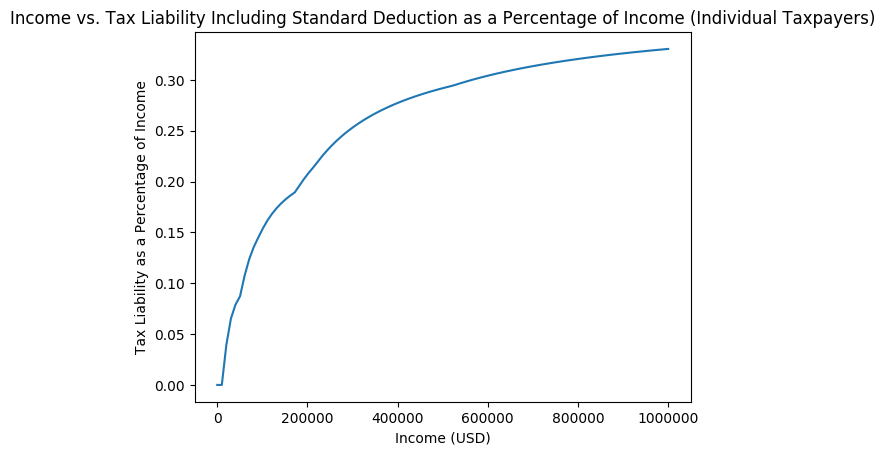

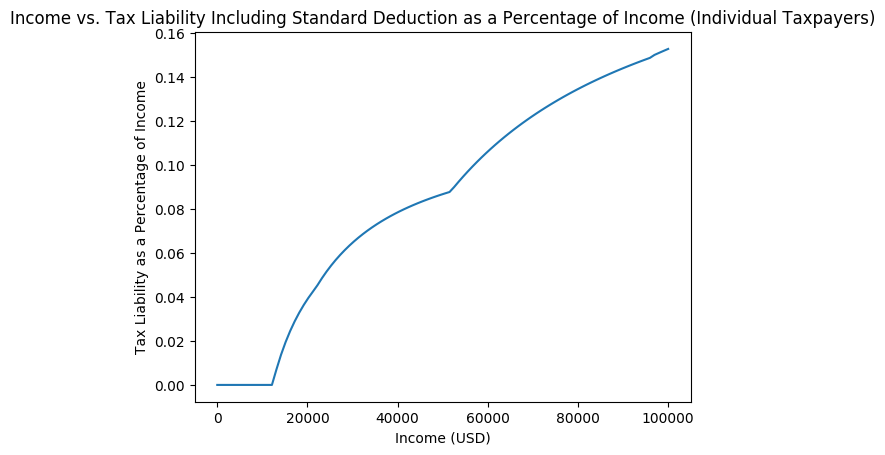

In [ ]:
# We can also plot the total percentage of income being paid in taxes as a function of income
# This allows us to get a better idea of how progressive the tax rates in America are

plt.rcdefaults()
def piecew(x):
  conds = [(x > 0) & (x < 12200), (x > 12200) & (x < 21900), (x > 21900) & (x < 51675), (x > 51675) & (x < 96200), (x > 96200) & (x < 172925), (x > 172925) & (x < 216300), (x > 216300) & (x < 522500), x > 522500]
  funcs = [lambda x: 0, lambda x: (0.1*(x - 12200)) / x, lambda x: (970 + 0.12*(x - 21900)) / x, 
           lambda x: (4543 + 0.22*(x - 51675)) / x, lambda x: (14382 + 0.24*(x - 96200)) / x, lambda x: (32748 + 0.32*(x - 172925)) / x, 
           lambda x: (46628 + 0.35*(x - 216300)) / x, lambda x: (153798 + 0.37*(x - 522500)) / x]
  return np.piecewise(x, conds, funcs)

xx = np.linspace(0, 1000000, 100)
plt.plot(xx, piecew(xx))
plt.title('Income vs. Tax Liability Including Standard Deduction as a Percentage of Income (Individual Taxpayers)')
plt.xlabel('Income (USD)')
plt.ylabel('Tax Liability as a Percentage of Income')
plt.show() # or plt.savefig('foo.eps')

xx = np.linspace(0, 100000, 100)
plt.plot(xx, piecew(xx))
plt.title('Income vs. Tax Liability Including Standard Deduction as a Percentage of Income (Individual Taxpayers)')
plt.xlabel('Income (USD)')
plt.ylabel('Tax Liability as a Percentage of Income')
plt.show() # or plt.savefig('foo.eps')

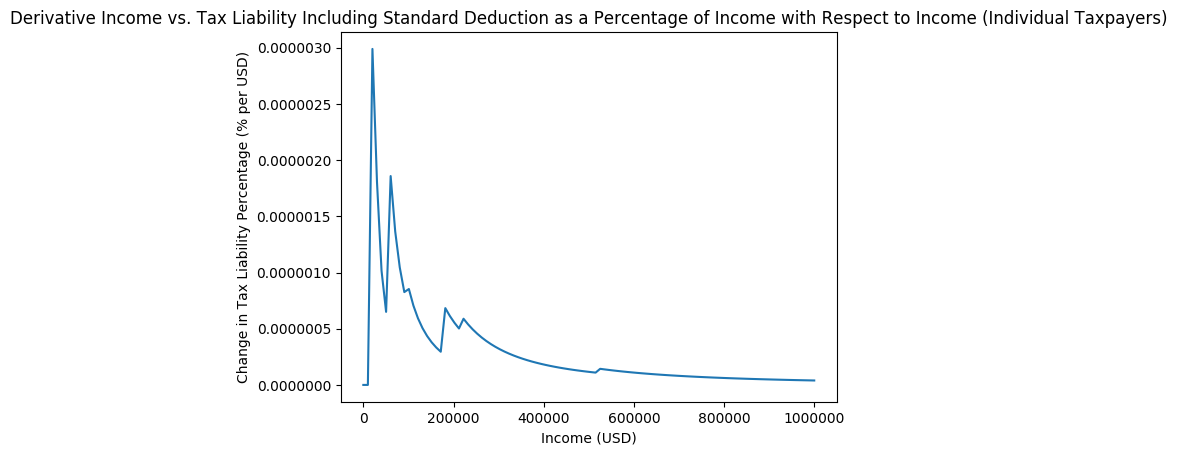

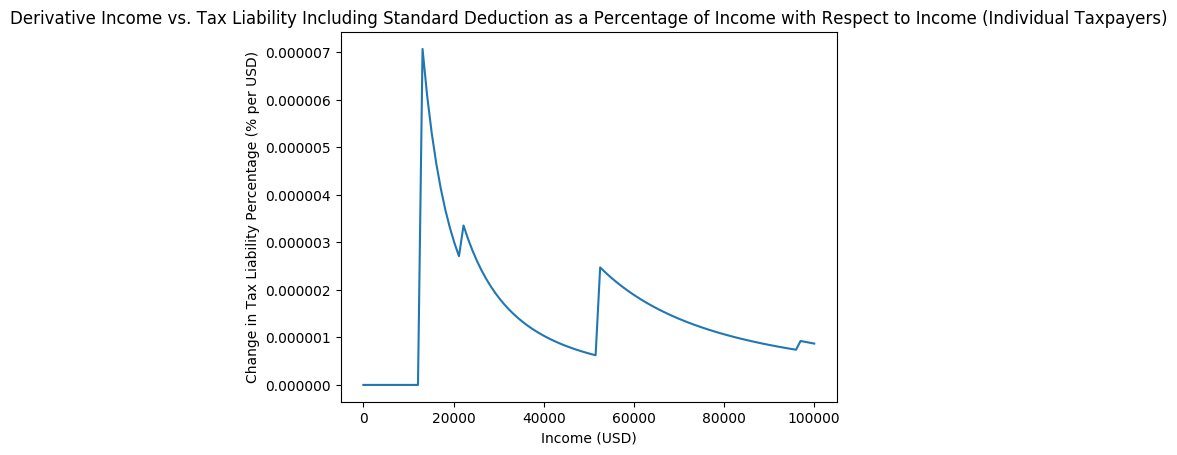

In [ ]:
# We can also plot the derivative of the tax percentage curve (with respect to income) in order to gague the rate in increase in tax liabilities as a percentage of income
# This allows us to better gague how progressive the U.S. tax rates are

plt.rcdefaults()
def piecew(x):
  conds = [(x > 0) & (x < 12200), (x > 12200) & (x < 21900), (x > 21900) & (x < 51675), (x > 51675) & (x < 96200), (x > 96200) & (x < 172925), (x > 172925) & (x < 216300), (x > 216300) & (x < 522500), x > 522500]
  funcs = [lambda x: 0, lambda x: 1220 / (x**2), lambda x: 1658 / (x**2), 
           lambda x: 13651 / (2*x**2), lambda x: 8706 / (x**2), lambda x: 22588 / (x**2), 
           lambda x: 29077 / (x**2), lambda x: 39527 / (x**2)]
  return np.piecewise(x, conds, funcs)

xx = np.linspace(0, 1000000, 100)
plt.plot(xx, piecew(xx))
plt.title('Derivative Income vs. Tax Liability Including Standard Deduction as a Percentage of Income with Respect to Income (Individual Taxpayers)')
plt.xlabel('Income (USD)')
plt.ylabel('Change in Tax Liability Percentage (% per USD)')
plt.show() # or plt.savefig('foo.eps')

xx = np.linspace(0, 100000, 100)
plt.plot(xx, piecew(xx))
plt.title('Derivative Income vs. Tax Liability Including Standard Deduction as a Percentage of Income with Respect to Income (Individual Taxpayers)')
plt.xlabel('Income (USD)')
plt.ylabel('Change in Tax Liability Percentage (% per USD)')
plt.show() # or plt.savefig('foo.eps')

As we can see, the current taxation system is overcomplicated. The tax curve is actually a piecewise function consisting of 8 individual functions, each of which corresponds to a tax bracket. The standard deduction, despite its name, isn't a special deduction which applies to a portion of the population; instead, all individual taxpayers do not have to pay federal income tax on a certain portion of income. 

Instead of using complicated tax brackets, it would be more convenient to use a continuous tax function. This function will have an asymptote equal to the piecewise function representing the highest tax bracket.

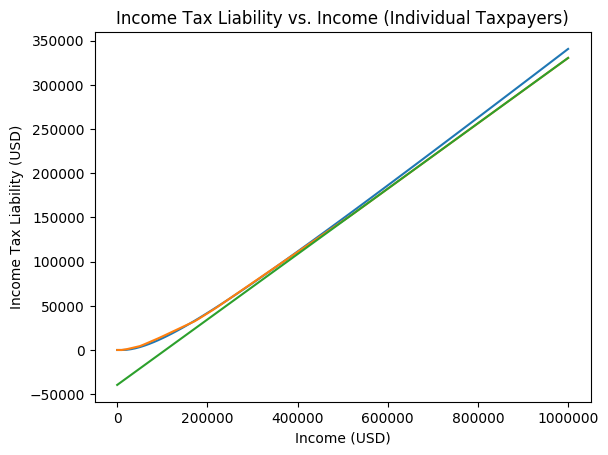

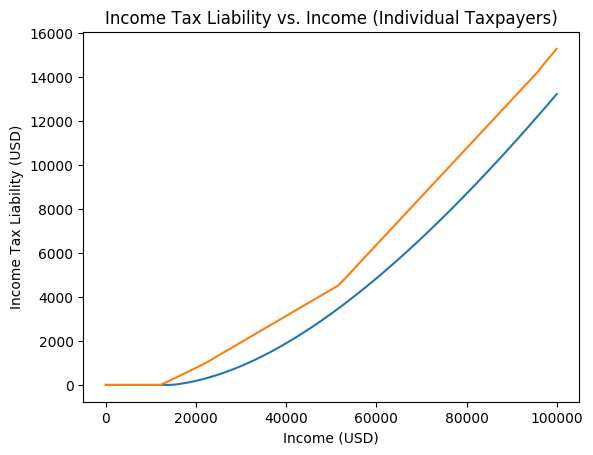

In [ ]:
# We can also plot the derivative of the tax percentage curve (with respect to income) in order to gague the rate in increase in tax liabilities as a percentage of income
# This allows us to better gague how progressive the U.S. tax rates are

a = 0.011
b = -1000
c = 79
d = 4400000
f = -85000
m = 1.044

plt.rcdefaults()
def newTaxFunction(x):
  conds = [(x > 0) & (x < 15000), (x > 15000)]
  funcs = [lambda x: 0, lambda x: (a*(x-f)+b)/(c*(x-f)+d)*((c/a)*m*0.38*(x-f)-(c/a)*39527-d/b)]
  return np.piecewise(x, conds, funcs)

# x = np.linspace(0, 1000000, 100) # can do np.arange(0, 1000000, 1000) since intervals are same
# y = (0.37 * (x - 12200)**2) / x
# plt.plot(x, y)
# plt.show()

# The orange line is the original tax liability function
# The blue line is the new tax liability function
# The green line is the asymptote of the original tax liability function

xx = np.linspace(0, 1000000, 100)
plt.plot(xx, newTaxFunction(xx))
plt.plot(xx, taxLiabilityFunction(xx))
asymptote = 153798 + 0.37*(xx - 522500)
plt.plot(xx, asymptote)

plt.title('Income Tax Liability vs. Income (Individual Taxpayers)')
plt.xlabel('Income (USD)')
plt.ylabel('Income Tax Liability (USD)')
plt.show() # or plt.savefig('foo.eps')

xx = np.linspace(0, 100000, 100)
plt.plot(xx, newTaxFunction(xx))
plt.plot(xx, taxLiabilityFunction(xx))
# asymptote = 153798 + 0.37*(xx - 522500)
# plt.plot(xx, asymptote)

plt.title('Income Tax Liability vs. Income (Individual Taxpayers)')
plt.xlabel('Income (USD)')
plt.ylabel('Income Tax Liability (USD)')
plt.show() # or plt.savefig('foo.eps')

BLS Education Levels and Marital Status Data: https://www.bls.gov/opub/mlr/2013/article/marriage-and-divorce-patterns-by-gender-race-and-educational-attainment.htm

BLS Income Data: https://www.bls.gov/opub/ted/2019/median-usual-weekly-earnings-of-men-and-women-2010-to-2018.htm